In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
f_birth=pd.read_csv("daily-total-female-births-CA.csv",index_col=[0],parse_dates=[0])

In [5]:
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [7]:
f_birth.size

365

In [18]:
series_value=f_birth.values

In [8]:
f_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<AxesSubplot:xlabel='date'>

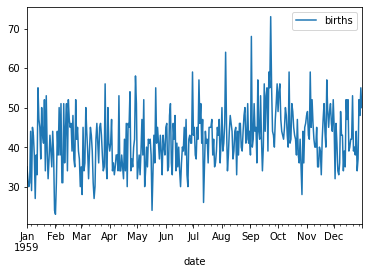

In [9]:
#visualizing the data
f_birth.plot()

In [15]:
#moving average
f_birth_mean=f_birth.rolling(window=50).mean()

<AxesSubplot:xlabel='date'>

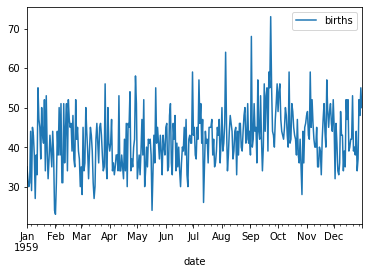

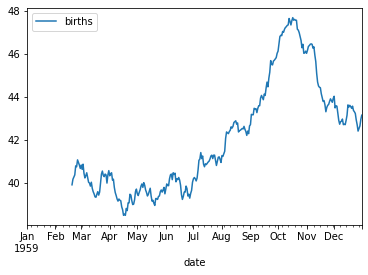

In [16]:
f_birth.plot()
f_birth_mean.plot()

In [20]:
value=pd.DataFrame(series_value)

In [23]:
# variable to create a lag of one
birth_df=pd.concat([value,value.shift(1)],axis=1)

In [24]:
birth_df.head()

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [25]:
#renaming the columns in birth_df
birth_df.columns=['Actual_birth','Forecasted_birth']

In [26]:
birth_df.head()

,Actual_birth,Forecasted_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [28]:
#alternative way of doing shifts
f_birth.births.shift(1)

date
1959-01-01     NaN
1959-01-02    35.0
1959-01-03    32.0
1959-01-04    30.0
1959-01-05    31.0
              ... 
1959-12-27    34.0
1959-12-28    37.0
1959-12-29    52.0
1959-12-30    48.0
1959-12-31    55.0
Name: births, Length: 365, dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [31]:
birth_df=birth_df[1:]

In [33]:
#calculating the mean squared error
birth_error=mean_squared_error(birth_df.Actual_birth,birth_df.Forecasted_birth)

In [35]:
birth_error

84.22252747252747

In [36]:
np.sqrt(birth_error)

9.177283229394606

# ARIMA

In [37]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

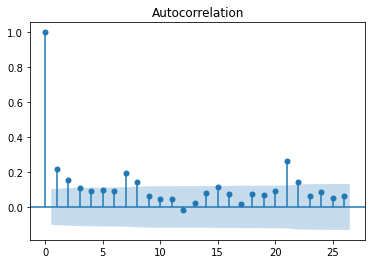

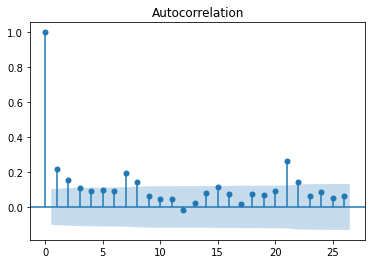

In [38]:
#plotting plot_acf
plot_acf(f_birth)

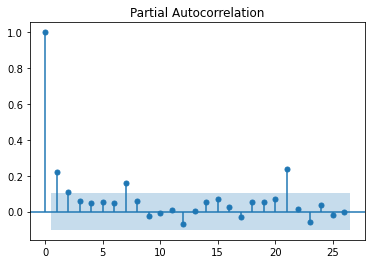

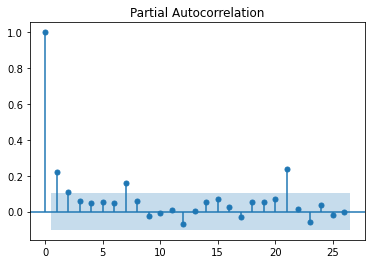

In [39]:
#plotting pacf
plot_pacf(f_birth)

In [42]:
#creating test and train data
birth_train=f_birth[0:330]
birth_test=f_birth[331:365]

In [43]:
from statsmodels.tsa.arima_model import ARIMA

In [48]:
birth_model=ARIMA(birth_train,order=(2,1,3))

C:\Users\HENRY GEORGE\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\HENRY GEORGE\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [49]:
birth_model_fit=birth_model.fit()

C:\Users\HENRY GEORGE\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [52]:
#fitting aic 
birth_model_fit.aic

2230.948255315599

In [53]:
#forecasting
birth_forecast=birth_model_fit.forecast(steps=35)[0]

In [54]:
birth_forecast

array([45.30363882, 46.31057857, 43.6494557 , 44.59215127, 46.49699153,
       44.34346375, 44.08980973, 46.34382805, 45.07531867, 43.88103132,
       45.95207272, 45.69572091, 43.97395317, 45.45667316, 46.1037119 ,
       44.31131354, 44.99227544, 46.260118  , 44.79341916, 44.66468724,
       46.18565463, 45.30632482, 44.53318079, 45.94662886, 45.74838079,
       44.60560086, 45.63332563, 46.04978162, 44.84519997, 45.33687605,
       46.18212282, 45.18581114, 45.12976944, 46.15758797, 45.55075868])

In [55]:
birth_test

,births
date,
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34
1959-12-06,33
